# Notebook to validate correct Yolo implementation

✅ Loaded model from: /Users/dariusgiannoli/Desktop/Recognition-BenchMark/training/runs/bird_artroom_finetune4/weights/best.pt
🔍 Prediction: background (0.00) in 432.21 ms

0: 384x640 (no detections), 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Still no detection at 0.1 confidence.


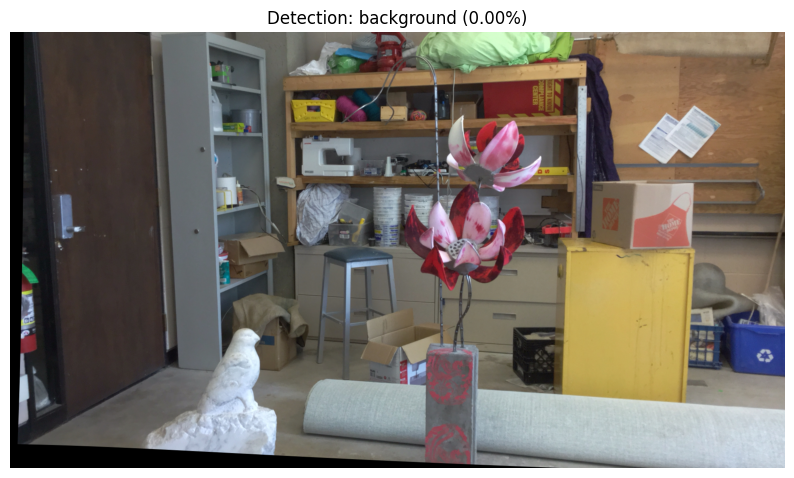

In [1]:
import sys
import os
from pathlib import Path

# Add project root to path
PROJECT_ROOT = Path(os.getcwd()).parent
sys.path.insert(0, str(PROJECT_ROOT))

import cv2
import matplotlib.pyplot as plt
from src.detectors.yolo import YOLODetector
from src.config import PROJECT_ROOT

# 1. Initialize the detector (it now uses your best.pt)
detector = YOLODetector()
print(f"✅ Loaded model from: {detector.model_path}")

# 2. Path to an image you want to test (e.g., your im0.png or one of the training images)
img_path = str(PROJECT_ROOT / "data/artroom/im0.png")
img = cv2.imread(img_path)

if img is None:
    print(f"❌ Could not find image at {img_path}")
else:
    # 3. Predict using your custom wrapper
    label, conf, ms = detector.predict(img)
    print(f"🔍 Prediction: {label} ({conf:.2f}) in {ms:.2f} ms")

    # 4. Use YOLO's built-in plotting to see the result
    # We access the internal model results for visualization
    results = detector.model(img, conf=0.1, iou=0.2) 
    annotated_img = results[0].plot() # This draws the box and label

# 2. Print the raw confidence to see why it was hidden before
if len(results[0].boxes) > 0:
    print(f"Bird found with confidence: {results[0].boxes[0].conf.item():.4f}")
else:
    print("Still no detection at 0.1 confidence.")
    
    

    # 5. Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Detection: {label} ({conf:.2%})")
    plt.axis('off')
    plt.show()

In [ ]:
# 1. Force reload the model directly from the latest path
from ultralytics import YOLO
import torch

# MANUALLY PASTE YOUR LATEST PATH HERE TO BE 100% SURE
latest_weights = str(PROJECT_ROOT / "training/runs/bird_artroom_finetune2/weights/best.pt")
model = YOLO(latest_weights)

# 2. Run prediction with 0.001 confidence (Show me everything!)
results = model(img, conf=0.001)

if len(results[0].boxes) == 0:
    print("❌ The model is 100% certain there is NO bird. This means the weights are empty or the image is 'poisoned'.")
else:
    print(f"🎯 Model found {len(results[0].boxes)} potential objects:")
    for box in results[0].boxes:
        print(f"   --> Class: {int(box.cls)} | Conf: {box.conf.item():.4f} | Label: {model.names[int(box.cls)]}")

# 3. Visual check
plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
plt.show()